# 使用聚类算法聚类消费行为特征


In [48]:
import pandas as pd
inputfile='consumption_data.xls'
outputfile ='../tmp/data_type.xls'
k=3
iteration =500

In [6]:
data =pd.read_excel(inputfile,index_col='Id')

In [15]:
# 归一化

data_zs=1.0*(data-data.mean(0))/data.std()

In [24]:
# 调用聚类模型
from sklearn.cluster import KMeans
model =KMeans(n_clusters =k,n_jobs=4, max_iter =iteration)
model.fit(data_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
model.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0,

In [27]:
# 打印结果
r1 =pd.Series(model.labels_).value_counts()
r2 =pd.DataFrame(model.cluster_centers_)
r= pd.concat([r2,r1],axis=1)
r.columns =list(data.columns) +['类别数目']


In [35]:
r

,R,F,M,类别数目
0,-0.160451,1.114802,0.392844,341
1,-0.149353,-0.658893,-0.271780,559
2,3.455055,-0.295654,0.449123,40


In [43]:
# 输出原始数据及其类别
r0=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
r0.columns=list(data.columns)+['聚类类别']

In [44]:
r0

,R,F,M,聚类类别
Id,,,,
1,27,6,232.61,1
2,3,5,1507.11,0
3,4,16,817.62,1
4,3,11,232.81,1
5,14,7,1913.05,0
6,19,6,220.07,1
7,5,2,615.83,1
8,26,2,1059.66,0
9,21,9,304.82,1


In [49]:
r.to_excel(outputfile)

In [50]:
#绘制聚类后的概率密度图

LinAlgError: singular matrix

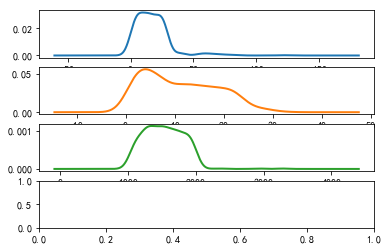

In [77]:
pic_output ='../tmp/pd_'
for i in range(k):
    density_plot(r0[r0['聚类类别']==i]).savefig('%s%s.png' %(pic_output,i))

In [78]:
r0[r0['聚类类别']==1]

,R,F,M,聚类类别
Id,,,,
1,27,6,232.61,1
3,4,16,817.62,1
4,3,11,232.81,1
6,19,6,220.07,1
7,5,2,615.83,1
9,21,9,304.82,1
11,15,2,521.02,1
12,26,3,438.22,1
17,93,2,1016.34,1


In [123]:
def  density_plot(data):
    import matplotlib.pyplot as plt
    for i in range(k):
        data0=data[data['聚类类别']==i]
        for column in data0.columns[:3]:
            data0[column].plot(kind='kde',label=column)
            '''dic={}
            initferq =1/sum(data[column])
            for value in data[column]:
                if value in dic:
                    dic[value]+=initferq
                else:
                    dic[value]=initferq
            plt.scatter(list(dic.keys()),list(dic.values()))
            '''
            plt.ylabel('密度')
            plt.xlabel('聚类类别%s' % i)
            plt.show()

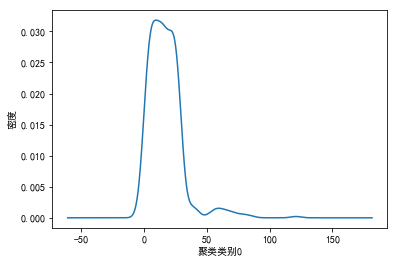

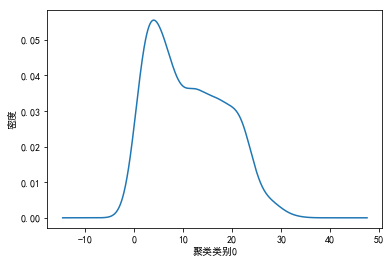

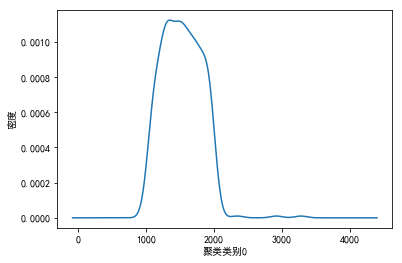

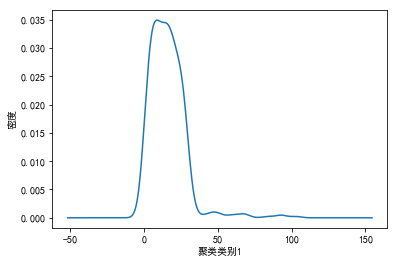

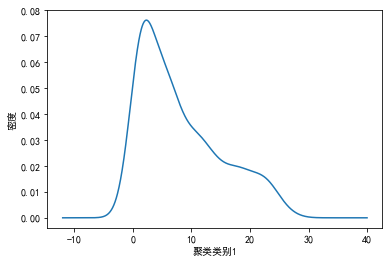

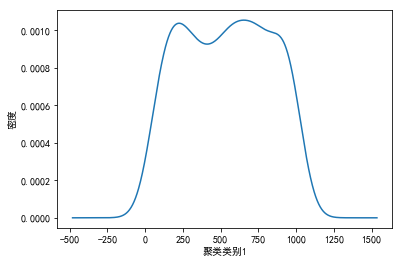

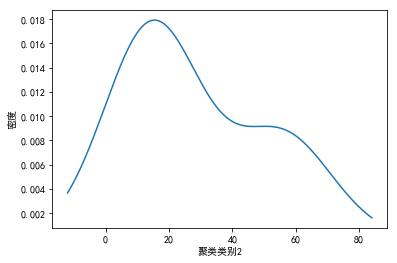

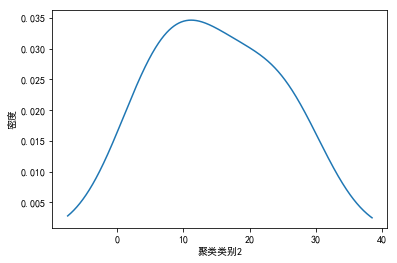

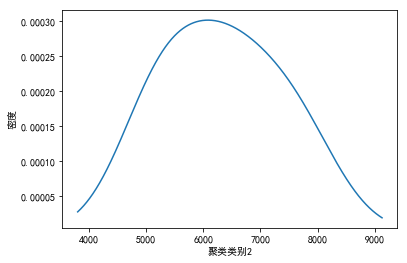

In [124]:
density_plot(r0)

# 聚类算法的评价方法·

## 1.purity评价
计算正确聚类数战总数的比例：
purity(X,Y)=$\frac{1}{n} \sum_k max|x_{ik} \cap y_i|$

$x_k$表示第k个聚类集合，y表示被聚类的集合

## 2.RI评价方法

RI=$ \frac{R+W}{R+M+D+W}$

R指在一类的两个对象正确分类，W指不在一个聚类簇被正确分开了
M指不应该在一起的在一起了，D指不应该分开的却被分开了

## 3.F值评价方法
评价公式： $F_{\alpha}=\frac{(1+\alpha^2)pr}{\alpha^2 p+r}$

其中,p是精确率，r为召回率

In [125]:
from sklearn.manifold import TSNE

In [142]:
tsne =TSNE()
tsne.fit_transform(data_zs)
tsne =pd.DataFrame(tsne.embedding_,index =data_zs.index)

In [143]:
tsne

,0,1
Id,,
1,16.857365,21.074318
2,14.122032,-25.077150
3,-27.101397,23.784323
4,-20.412571,28.003777
5,0.194336,-19.741730
6,18.144958,15.913079
7,32.673866,-9.208040
8,7.714698,-2.093226
9,14.220677,17.327993


In [144]:
d1=tsne[r0['聚类类别']==0]
d2=tsne[r0['聚类类别']==1]
d3=tsne[r0['聚类类别']==2]

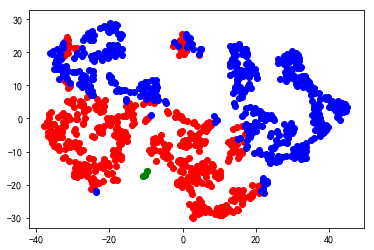

In [145]:
plt.scatter(d1[0],d1[1],color='r')
plt.scatter(d2[0],d2[1],color='b')
plt.scatter(d3[0],d3[1],color='g')
plt.show()

In [139]:
d1[0]

Id
2      25.175972
5      42.895466
8     -15.733089
10      2.799058
13     42.022064
14     41.468414
15     40.845875
16     41.512894
22     42.446499
23     16.839994
26     37.328545
27     41.885323
28     42.068100
34    -23.431168
35      6.107330
38     12.311371
39     38.523800
42     40.597816
46      3.763200
49     43.149067
50     38.497097
51     41.903290
52     42.233673
53     42.974785
57      4.203763
58     38.561485
59      4.243724
61    -19.224552
62     19.153692
64     29.089136
         ...    
895   -24.110428
897    26.935133
898    43.226814
899     8.481652
902    41.229710
905    41.330387
908    37.115879
909    34.774014
910    29.855200
912     3.861454
913    36.571331
914   -23.878286
916    42.416370
917    33.251423
918    42.323067
919   -21.851286
922   -16.214405
923    10.132598
924     7.472391
927    38.366512
928    24.490313
929    25.023968
931    42.543205
932     7.264259
933    42.583923
934    33.721825
936    40.099541
937    43.4